<a href="https://colab.research.google.com/github/paigemb/Gothic-Analysis/blob/main/GothicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis on Gothic Literature

## Imports/Kaggle Setup

In [ ]:
! pip install -q kaggle
! pip install wordcloud


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paigemb","key":"bd593be015158ad3b979e7680c23f5da"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51             58  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44            100  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates           4KB  2020-11-19 17:13:32             51  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57             24  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collisio

In [ ]:
!kaggle datasets download -d charlesaverill/gothic-literature

  0% 0.00/1.61M [00:00<?, ?B/s]
100% 1.61M/1.61M [00:00<00:00, 113MB/s]


In [ ]:
!unzip -q gothic-literature.zip -d .


## Word Cloud Visualization

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stopwords
import matplotlib.pyplot as plt
import pandas as pd 


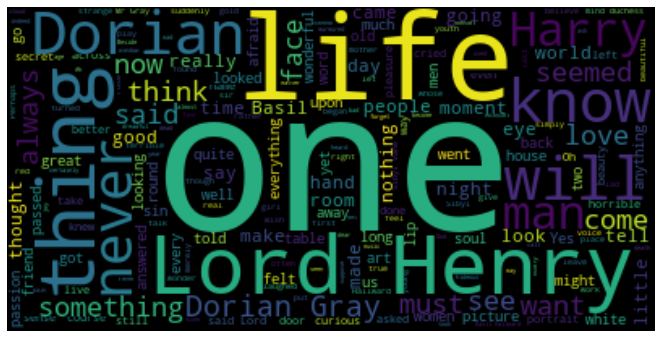

In [ ]:

cloud = WordCloud(stopwords=stopwords).generate(open ("doriangray.txt").read())
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
stopwords = set(stopwords)
stopwords.update(["will", "thing", "one","know"])
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


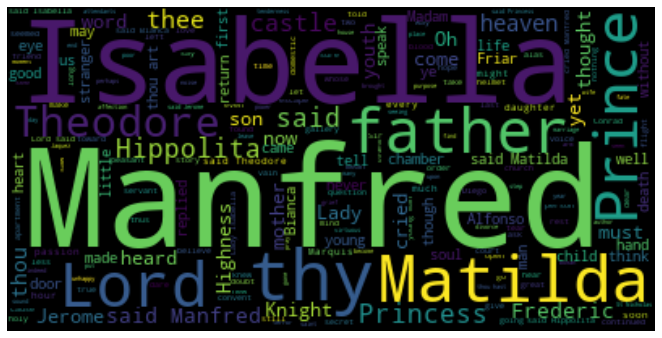

In [ ]:
cloud = WordCloud(stopwords=stopwords).generate(open ("castleofotranto.txt").read())
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
stopwords = set(stopwords)
stopwords.update(["thy", "said", "thee","will"])
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

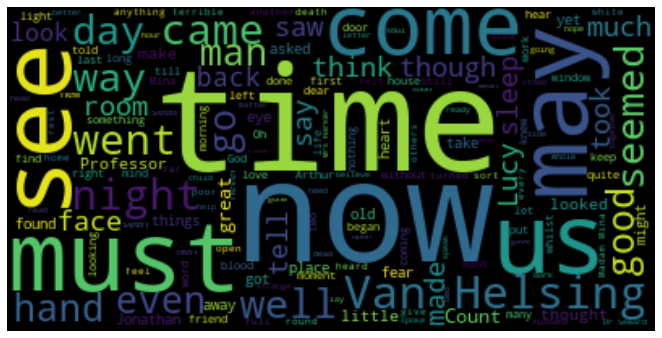

In [ ]:

cloud = WordCloud(stopwords=stopwords).generate(open ("dracula.txt").read())
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
stopwords = set(stopwords)
stopwords.update(["will", "thing", "one","know","now", "said"])
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

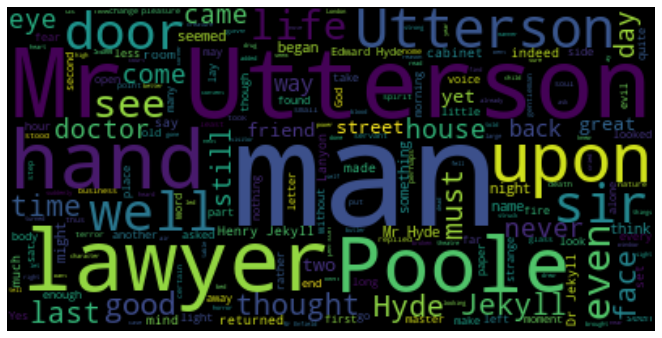

In [ ]:

cloud = WordCloud(stopwords=stopwords).generate(open ("drjekyllmrhyde.txt").read())
stopwords = set(stopwords)
stopwords.update(["will", "thing", "one","man"])
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

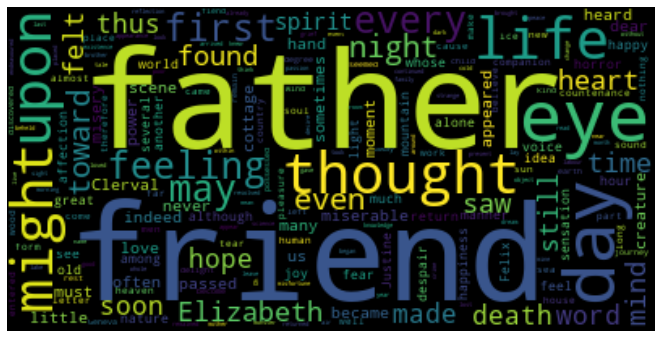

In [ ]:
cloud = WordCloud(stopwords=stopwords).generate(open ("frankenstein.txt").read())
stopwords = set(stopwords)
stopwords.add("will") 
stopwords.add("thing")
stopwords.add("one")
stopwords.add("now")
stopwords.add("yet")
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

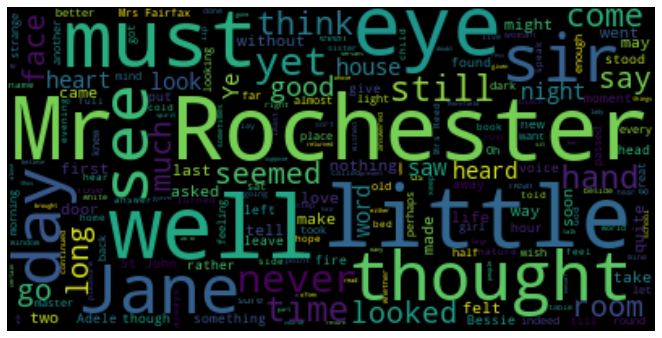

In [ ]:
cloud = WordCloud(stopwords=stopwords).generate(open ("janeeyre.txt").read())
plt.figure(figsize=(9, 9), facecolor=None)
stopwords = set(stopwords)
stopwords.update(["will", "said", "one","now"])
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

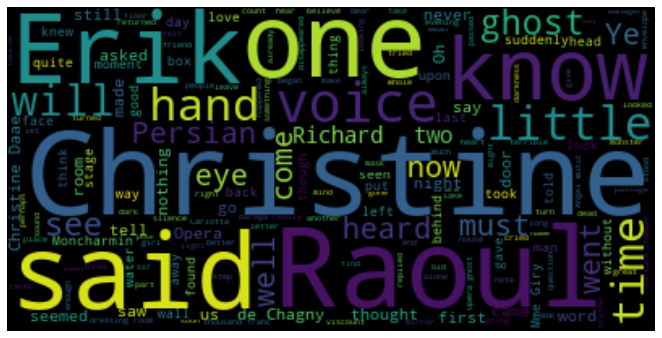

In [ ]:
cloud = WordCloud().generate(open ("phantomoftheopera.txt").read())
stopwords = set(stopwords)
stopwords.update(["will", "said", "one","know"])
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

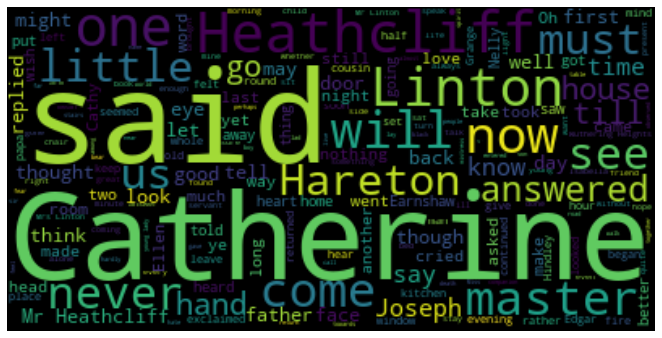

In [ ]:
cloud = WordCloud().generate(open ("wutheringheights.txt").read())
plt.figure(figsize=(9, 9), facecolor=None)
stopwords = set(stopwords)
stopwords.update(["will", "said", "one","now"])
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Sentiment Analysis

Imports

In [ ]:
!pip install nltk
!pip install vaderSentiment


In [ ]:
from urllib.request import urlopen
import re
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import numpy as np



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Store books as variables 

In [ ]:
castle = 'castleofotranto.txt'
dorian = 'doriangray.txt'
dracula = 'dracula.txt'
drj = 'drjekyllmrhyde.txt'
frank = 'frankenstein.txt'
jane = 'janeeyre.txt'
phantom = 'phantomoftheopera.txt'
wuth = 'wutheringheights.txt'
pride = 'pride.txt'
uncle = 'uncle.txt'
scarlet = 'scarlett.txt'
emma = 'emma.txt'
war = 'war.txt'
meta = 'metamorph.txt'
cities = 'cities.txt'


Tokenize books into chapters

In [ ]:
def tokenize(book):
  dg_book = open(book, "r") 
  dg_book = str(dg_book.read()) 
  chapters = re.split("Chapter ", dg_book, flags = re.IGNORECASE) 
  chapters.pop(0) 
  for i in range(1, len(chapters)+1): 
      writeBook = open(book+"{}.txt".format(i), "w+") 
      writeBook.write(chapters[i-1])
      writeBook.close() 
  print("done")

Run Sentiment Analysis on Book

In [ ]:
def sentAnalysis(bookName, chapters):
  pos_index = []
  neg_index = []
  neutral_index = []
  positive = 0
  negative = 0
  neutral = 0
 
  sid_obj = SentimentIntensityAnalyzer()
  for book in range(1,chapters): #go through each chapter
    file = open(bookName + str(book) + '.txt').read()
    textList = sent_tokenize(file) #break chapters into lines to analyze 
    lines = np.array(textList) 
    pos = 0 
    neg = 0
    neu = 0


    for line in lines: #iterate through each line in chapter and give a sentiment score
      sentiment_dict = sid_obj.polarity_scores(line)
      if sentiment_dict['compound'] >= 0.05 :
        pos+=1
        positive+=1
      elif sentiment_dict['compound'] <= - 0.05 :
        neg+=1
        negative +=1
      else:
        neu+=1
        neutral +=1
    #take averages
    n = len(lines)
    pos_index.append(pos/n)
    neg_index.append(neg/n)
    neutral_index.append(neu/n)
  #plot results  
  X = np.arange(1,chapters)
  plt.plot(X,pos_index,'-.',label='pos')
  plt.plot(X,neg_index, '--',label='neg')
  plt.plot(X,neutral_index,'-',label='neu')
  plt.legend()
  plt.xticks(X)
  plt.xlabel('Chapter')
  plt.ylabel('Sentiment')
  plt.grid()
  plt.show()
  print(positive) #return as array 
  print(negative)
  print(neutral)

**The Picture of Dorian Gray**

In [ ]:
tokenize(dorian)


done


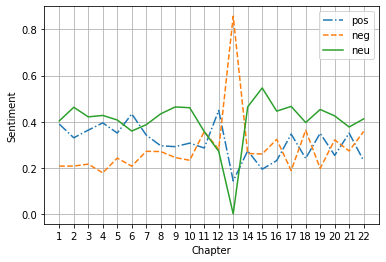

2102
1629
2747


In [ ]:
sentAnalysis(dorian,23)

**Frankenstein**

In [ ]:
tokenize(frank)

done


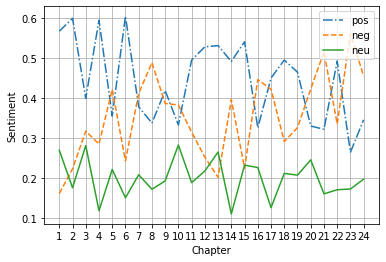

1222
1063
581


In [ ]:
sentAnalysis(frank,25)

**Dracula**

In [ ]:
tokenize(dracula)

done


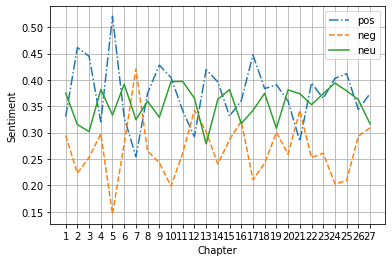

3157
2279
3010


In [ ]:
sentAnalysis(dracula,28)

**Jane Eyre**

In [ ]:
tokenize(jane)

done


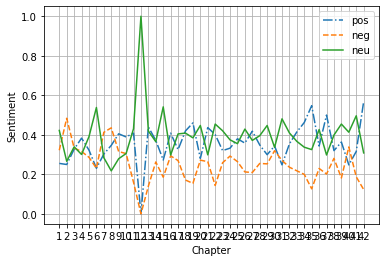

3554
2408
3772


In [ ]:
sentAnalysis(jane,43)

**Wuthering Heights**

In [ ]:
tokenize(wuth)

done


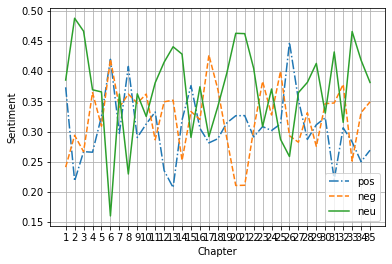

2029
2218
2569


In [ ]:
sentAnalysis(wuth,36)

**Castle of Otranto**

In [ ]:
tokenize(castle)

done


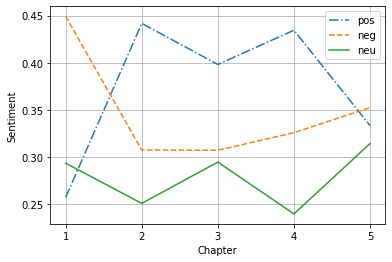

544
507
409


In [ ]:
sentAnalysis(castle,6)

**Frankenstein**

In [ ]:
tokenize(frank)

done


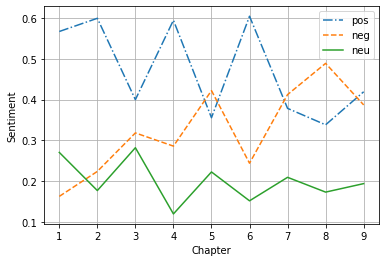

444
334
193


In [ ]:
sentAnalysis(frank,10)

### Closer Look into The Picture of Dorian Gray





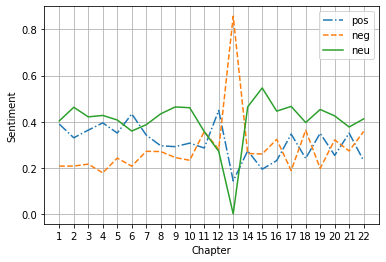

2102
1629
2747


In [ ]:
sentAnalysis(dorian, 23)

Looking at this graph, we can see there is a significant change at Chapter 13. The negative sentiment score reaches an alltime high while postive and netural both dip. Those familar with the novel will recall that Chapter 13 is in fact the climax of the novel, and arguably the most intense chapter. In a way, this analysis serves as a plot diagram !

## Time Period Comparison

In [ ]:
tokenize(pride)

done


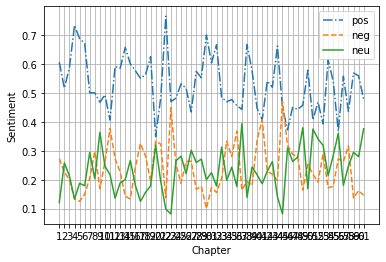

2443
1144
1199


In [ ]:
sentAnalysis(pride,62)

In [ ]:
tokenize(cities)

done


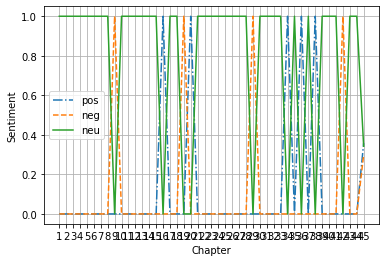

2082
1744
2022


In [ ]:
sentAnalysis(cities, 46)

In [ ]:
tokenize(emma)

done


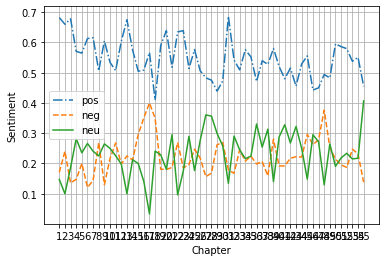

3250
1280
1510


In [ ]:
sentAnalysis(emma,56)

In [ ]:
tokenize(uncle)

done


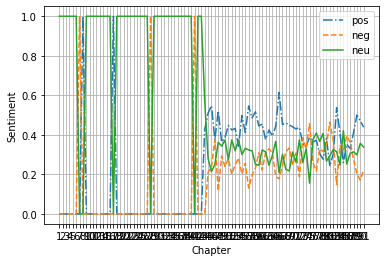

3113
2044
2340


In [ ]:
sentAnalysis(uncle,92)

In [ ]:
tokenize(war)

done


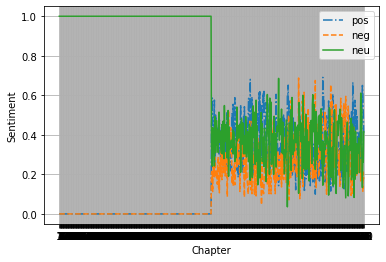

9323
7169
10478


In [ ]:
sentAnalysis(war,732)


* Castle: 1764 
* pride 1813 
* emma 1815 
* Frank: 1818 
* Wuthering 1847 
* Jane Eyre 1847 
* uncle 1852 
* cities 1859 
* war 1867 
* Dr Jenkly : 1886 
* Dorian Gray: 1890 
* Dracula: 1897
* Phantom 1910 







